# Importing Libraries

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

## Data Loading and Preprocessing

In [33]:
data_dir = "/kaggle/input/brain-tumor-classification-mri/Training"

class_names = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

def load_data(data_directory):
    images = []
    labels = []
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_directory, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                img_path = os.path.join(class_dir, filename)
                img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(class_idx)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the data
X, y = load_data(data_dir)

# Normalize the pixel values
X = X / 255.0

# Convert class vectors to binary class matrices
y = to_categorical(y, num_classes=len(class_names))

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Prepare iterators
train_gen = data_gen.flow(X_train, y_train, batch_size=32)
val_gen = data_gen.flow(X_val, y_val, batch_size=32)


## Model Training

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model summary
model.summary()

In [ ]:
# Define a callback to prevent overfitting
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
]

# Train the model
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=50,
    validation_data=val_gen,
    validation_steps=len(val_gen),
    callbacks=callbacks
)

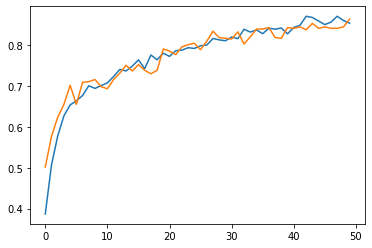

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

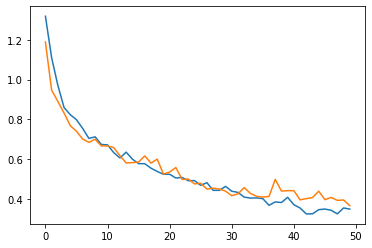

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])